In [168]:
!dir ../common 
import sys
sys.path.append('..')

from common import time_average

__init__.py  __pycache__  time_average.py


In [169]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

pd.set_option('max_colwidth',20)

from itertools import groupby

In [170]:
df = pd.read_csv('carts_passenger_stats_epoch_0.csv', sep='\t')
df.index.names 

FrozenList([None])

In [171]:
df.set_index(['daytime', 'passID'], inplace=False)

Unnamed: 0 passengerType  arrival_time fromStop    toStop  \
daytime  passID                                                              
07:07:11 1                0        single           234      S_2  ---> S_5   
07:10:08 0                1        single           225      S_3  ---> S_7   
07:12:28 2                2        single           424      S_7  ---> S_0   
07:21:07 3                3        single           757      S_0  ---> S_6   
07:30:23 5                4        single          1166      S_1  ---> S_3   
07:32:30 4                5        single          1114      S_3  ---> S_5   
07:37:44 6                6        single          1188      S_1  ---> S_0   
         7                7        single          1288      S_4  ---> S_0   
07:42:52 8                8        single          1718      S_6  ---> S_3   
07:43:53 9                9        single          1942      S_1  ---> S_4   
07:44:57 10              10        single          2213      S_0  ---> S_5   
07:52:42 13              11        single          2566      S_7  ---> S_1   
07:55:34 11              12        single          2300      S_5  ---> S_3   
         15              13        single          2873      S_1  ---> S_3   
07:57:30 12              14        single          2438      S_0  ---> S_5   
08:00:27 14              15        single          2676      S_0  ---> S_7   
08:08:37 16              16        single          3229      S_0  ---> S_4   
08:09:50 17              17        triple          3807      S_4  ---> S_5   
         18              18        triple          3807      S_4  ---> S_5   
         19              19        triple          3807      S_4  ---> S_5   
08:32:01 20              20        single          4599      S_7  ---> S_2   
08:34:03 21              21        single          4752      S_1  ---> S_4   
08:35:11 22              22        single          4864      S_0  ---> S_5   
08:42:46 29              23        single          5405      S_2  ---> S_1   
         24              24        single          5263      S_7  ---> S_1   
08:46:31 32              25        single          6099      S_1  ---> S_4   
08:48:30 23              26        single          5200      S_7  ---> S_6   
         30              27        single          5794      S_0  ---> S_6   
08:52:52 33              28        single          6105      S_4  ---> S_0   
08:58:01 35              29        single          6883      S_1  ---> S_3   
...                     ...           ...           ...      ...       ...   
19:34:56 334            327        couple         43735      S_6  ---> S_4   
19:36:01 338            328        single         44527      S_0  ---> S_5   
19:36:59 337            329        single         44370      S_1  ---> S_6   
19:48:09 339            330        couple         44677      S_1  ---> S_5   
         340            331        couple         44677      S_1  ---> S_5   
19:53:28 328            332        couple         42974      S_1  ---> S_0   
         329            333        couple         42974      S_1  ---> S_0   
19:55:52 348            334        single         46020      S_7  ---> S_1   
20:00:35 349            335        single         46207      S_0  ---> S_5   
20:05:47 303            336        triple         38494      S_1  ---> S_0   
         304            337        triple         38494      S_1  ---> S_0   
         305            338        triple         38494      S_1  ---> S_0   
20:17:44 352            339        triple         46806      S_1  ---> S_0   
         353            340        triple         46806      S_1  ---> S_0   
         354            341        triple         46806      S_1  ---> S_0   
         342            342        single         45619      S_1  ---> S_0   
20:22:59 355            343        single         47230      S_1  ---> S_2   
20:26:50 350            344        couple         46733      S_3  ---> S_6   
         351            345        coup

In [172]:
# df, df.head(20).index.tolist()
df.sort_index(inplace=True)
df 

,Unnamed: 0,passID,passengerType,daytime,arrival_time,fromStop,toStop,getIn_time,getOffTime,waitingDuration,carriedBy,stop_states
0,0,1,single,07:07:11,234,S_2,---> S_5,251.0,431.0,3.28,C_0,"[0, 0, 0, 0, 0, ..."
1,1,0,single,07:10:08,225,S_3,---> S_7,312.0,608.0,6.38,C_0,"[0, 0, 0, 0, 0, ..."
2,2,2,single,07:12:28,424,S_7,---> S_0,611.0,748.0,5.40,C_0,"[0, 0, 0, 0, 0, ..."
3,3,3,single,07:21:07,757,S_0,---> S_6,811.0,1267.0,8.50,C_0,"[0, 2, 0, 1, 0, ..."
4,4,5,single,07:30:23,1166,S_1,---> S_3,1657.0,1823.0,10.95,C_0,"[0, 0, 0, 1, 1, ..."
5,5,4,single,07:32:30,1114,S_3,---> S_5,1827.0,1950.0,13.93,C_0,"[0, 1, 0, 0, 0, ..."
6,6,6,single,07:37:44,1188,S_1,---> S_0,1657.0,2264.0,17.93,C_0,"[1, 1, 0, 0, 0, ..."
7,7,7,single,07:37:44,1288,S_4,---> S_0,1885.0,2264.0,16.27,C_0,"[1, 1, 0, 0, 0, ..."
8,8,8,single,07:42:52,1718,S_6,---> S_3,2008.0,2572.0,14.23,C_0,"[1, 0, 0, 0, 0, ..."
9,9,9,single,07:43:53,1942,S_1,---> S_4,2404.0,2633.0,11.52,C_0,"[1, 0, 0, 0, 0, ..."


# Mean Waiting Times at the stops

In [173]:
means = df.groupby(df.fromStop).waitingDuration.mean() 
means

fromStop
S_0    24.350120
S_1    60.863836
S_2    33.548500
S_3    18.580000
S_4    50.349730
S_5    24.397000
S_6    15.730769
S_7    25.178846
Name: waitingDuration, dtype: float64

In [174]:
meanshead = df.groupby(df.fromStop).waitingDuration.describe()

meanshead.index[0:]

Index(['S_0', 'S_1', 'S_2', 'S_3', 'S_4', 'S_5', 'S_6', 'S_7'], dtype='object', name='fromStop')

In [175]:
import matplotlib.style as style
# style.available


In [176]:
style.use('seaborn-white')

Text(0,0.5,'Waiting Time in Minutes')

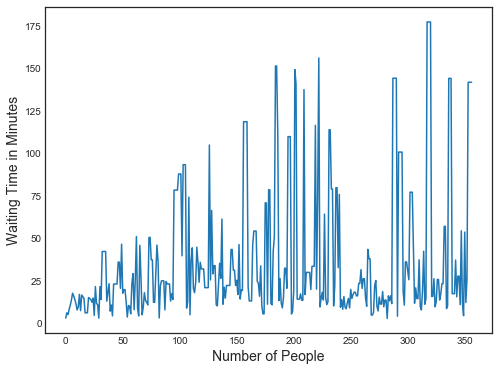

In [177]:
waitingDurations =df.waitingDuration
plt.figure(figsize=(8, 6))
plt.plot(waitingDurations)
plt.xlabel('Number of People', fontsize=14)
plt.ylabel('Waiting Time in Minutes', fontsize=14)

Mean waiting time over all the stops 31.62 mins 



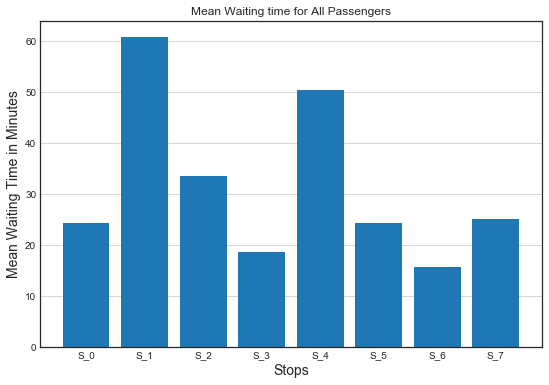

In [178]:
meanshead = df.groupby(df.fromStop).waitingDuration.describe()
meanshead.index[0:]

fig, ax = plt.subplots(figsize=(9,6))
ax.set_title('Mean Waiting time for All Passengers')
ax.yaxis.grid() 
ax.set_xlabel('Stops', fontsize = 14)
ax.set_ylabel('Mean Waiting Time in Minutes', fontsize = 14)

p1 = ax.bar(meanshead.index, means)
print('Mean waiting time over all the stops {:2.2f} mins'.format(means.mean()), '\n')


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff88425a5c0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7ff87fc91668>], dtype=object)

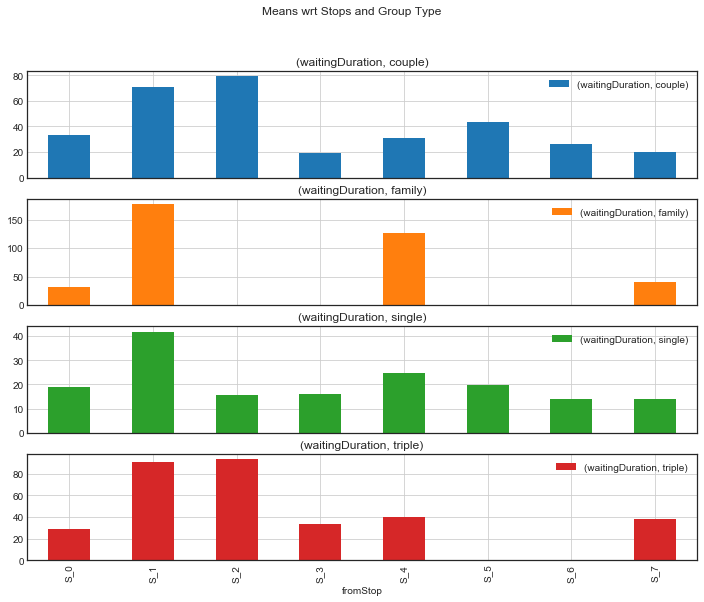

In [179]:
# passengertype_vs_stop = pd.crosstab(df.passengerType, df.fromStop,  margins=True)
# passengertype_vs_stop.plot(kind = 'bar', stacked ='False', figsize = (9, 6), subplots=True)


meansPassType = df.pivot_table(index=["fromStop", 'passengerType'], values= ['waitingDuration'], aggfunc= 'mean', fill_value=0)

meansPassType.unstack(level=1).plot(kind='bar', stacked ='True', subplots='True', figsize=(12, 9), grid='True', title= 'Means wrt Stops and Group Type')
 


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff87fc52da0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7ff87f595e10>], dtype=object)

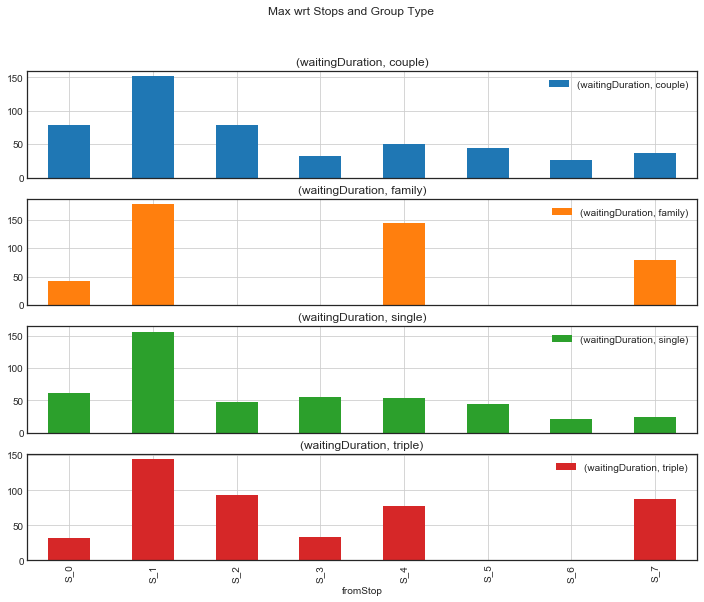

In [180]:
maxWaitingPassType = df.pivot_table(index=["fromStop", 'passengerType'], values= ['waitingDuration'], aggfunc= 'max', fill_value=0)

maxWaitingPassType.unstack(level=1).plot(kind='bar', stacked ='True', subplots='True', figsize=(12, 9), grid='True', title= 'Max wrt Stops and Group Type')

In [181]:
df.groupby('fromStop').waitingDuration.describe()

,count,mean,std,min,25%,50%,75%,max
fromStop,,,,,,,,
S_0,83.0,24.350120,16.682632,3.07,13.3400,20.030,31.1600,78.75
S_1,73.0,60.863836,54.908525,3.30,15.8200,35.500,109.9700,177.37
S_2,20.0,33.548500,33.609084,3.28,11.3525,14.635,54.8425,93.48
S_3,32.0,18.580000,11.549628,4.42,10.0175,16.050,26.4125,54.62
S_4,74.0,50.349730,44.123751,4.60,18.6700,30.620,71.5875,144.32
S_5,10.0,24.397000,13.793700,12.55,14.3850,17.390,38.0050,44.97
S_6,13.0,15.730769,6.216005,6.63,10.7000,14.230,19.5200,26.02
S_7,52.0,25.178846,23.949759,3.37,13.1700,18.550,23.3200,88.00


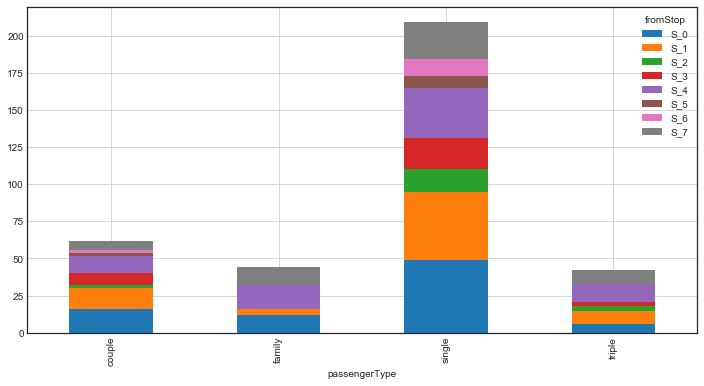

In [182]:
passengertype_vs_stop = pd.crosstab(df.passengerType, df.fromStop, margins=True)

passengertype_vs_stop = passengertype_vs_stop.drop('All',axis=1)
passengertype_vs_stop = passengertype_vs_stop.drop('All',axis=0) 

passengertype_vs_stop.plot(kind = 'bar', stacked ='True', figsize = (12, 6), subplots=False, grid=True)
 
 

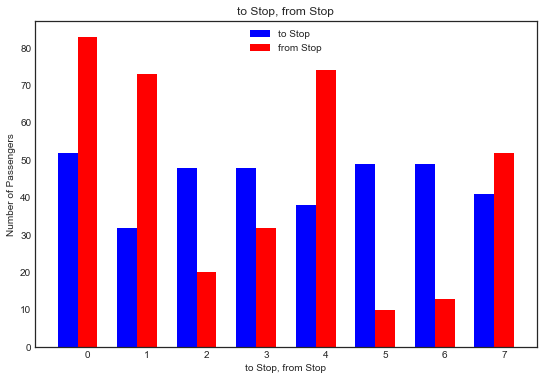

In [183]:
fromStopGroup = list(df.groupby('fromStop').toStop.count())
toStopGroup = list(df.groupby('toStop').fromStop.count())

indices = np.arange(8)
#Calculate optimal width
width = np.min(np.diff(indices))/3

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
p1 = ax.bar(indices-width, toStopGroup, width, color='b', label='-Ymin')
p2 = ax.bar(indices,fromStopGroup, width, color='r', label='Ymax')


# add some
ax.set_xlabel('to Stop, from Stop')
ax.set_ylabel('Number of Passengers')
ax.set_title('to Stop, from Stop')
ax.legend([p1, p2], ['to Stop', 'from Stop'], loc=9)

# ax.legend([p1], ["to Stop"], loc=9)
# ax.legend([p2], ["from Stop"], loc=3)
#ax.set_xticks(ind+width)
# ax.set_xticklabels( ('G1', 'G2', 'G3', 'G4', 'G5') )

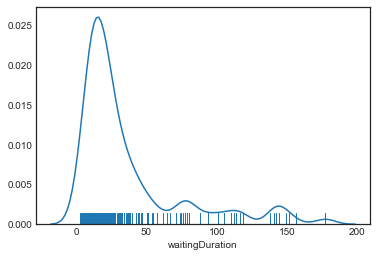

In [184]:
ax = sns.distplot(waitingDurations, rug=True, hist=False)

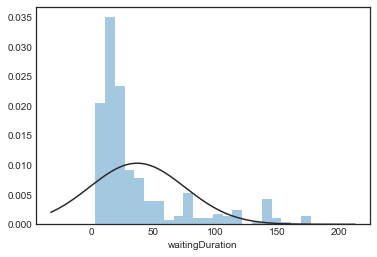

In [185]:
from scipy.stats import norm
ax = sns.distplot(waitingDurations, fit=norm, kde=False)

In [186]:
# sns.pairplot(df[['arrival_time', 'getIn_time', 'getOffTime', 'waitingDuration']]) 

In [187]:
df.head()

,Unnamed: 0,passID,passengerType,daytime,arrival_time,fromStop,toStop,getIn_time,getOffTime,waitingDuration,carriedBy,stop_states
0,0,1,single,07:07:11,234,S_2,---> S_5,251.0,431.0,3.28,C_0,"[0, 0, 0, 0, 0, ..."
1,1,0,single,07:10:08,225,S_3,---> S_7,312.0,608.0,6.38,C_0,"[0, 0, 0, 0, 0, ..."
2,2,2,single,07:12:28,424,S_7,---> S_0,611.0,748.0,5.40,C_0,"[0, 0, 0, 0, 0, ..."
3,3,3,single,07:21:07,757,S_0,---> S_6,811.0,1267.0,8.50,C_0,"[0, 2, 0, 1, 0, ..."
4,4,5,single,07:30:23,1166,S_1,---> S_3,1657.0,1823.0,10.95,C_0,"[0, 0, 0, 1, 1, ..."


In [188]:
singles = list(df.groupby('fromStop').passengerType.count())


In [189]:
stop_vs_passengertype = pd.crosstab(df.fromStop, df.passengerType, margins=True)
stop_vs_passengertype

passengerType,couple,family,single,triple,All
fromStop,,,,,
S_0,16,12,49,6,83
S_1,14,4,46,9,73
S_2,2,0,15,3,20
S_3,8,0,21,3,32
S_4,12,16,34,12,74
S_5,2,0,8,0,10
S_6,2,0,11,0,13
S_7,6,12,25,9,52
All,62,44,209,42,357


In [190]:
stop_vs_passengertype = stop_vs_passengertype.drop('All',axis=1)
stop_vs_passengertype = stop_vs_passengertype.drop('All',axis=0)

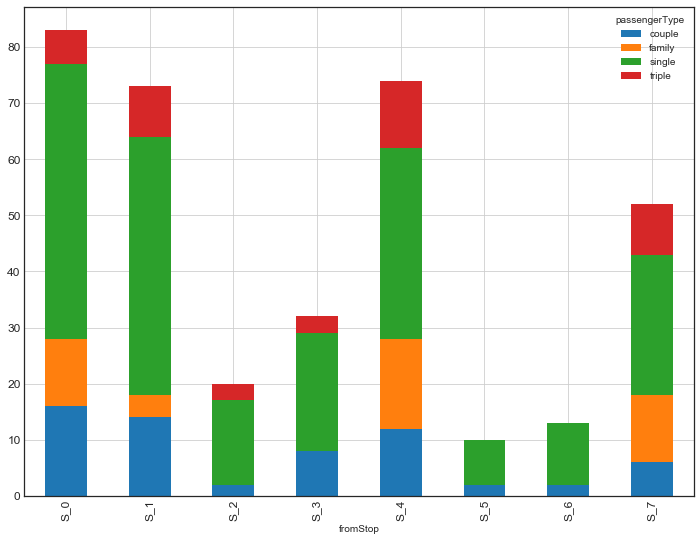

In [191]:
stop_vs_passengertype.plot(kind = 'bar', stacked ='True', figsize = (12, 9), subplots=False, grid=True, fontsize=12)

In [192]:
meanWaiting = df.groupby(['toStop', 'passengerType']).waitingDuration.mean().unstack(fill_value=0)
meanWaiting


passengerType,couple,family,single,triple
toStop,,,,
---> S_0,31.505000,100.345,22.382800,60.696
---> S_1,23.680000,81.550,14.383182,0.000
---> S_2,77.512000,144.320,23.385714,71.225
---> S_3,45.751429,30.150,23.499167,50.350
---> S_4,25.350000,42.450,23.724545,19.285
---> S_5,41.232500,22.470,27.082258,58.175
---> S_6,21.737500,89.705,27.039697,0.000
---> S_7,22.406000,118.720,24.557500,32.170


In [193]:
meanWaiting = df.groupby(['fromStop', 'passengerType']).waitingDuration.mean().unstack(fill_value=0)
meanWaiting


passengerType,couple,family,single,triple
fromStop,,,,
S_0,33.610000,31.69,18.998163,28.685000
S_1,70.712857,177.37,41.916087,90.606667
S_2,79.180000,0.00,15.478000,93.480000
S_3,19.000000,0.00,16.255714,33.730000
S_4,30.850000,126.46,24.933235,40.382500
S_5,43.650000,0.00,19.583750,0.000000
S_6,26.020000,0.00,13.860000,0.000000
S_7,20.216667,41.01,13.940400,38.596667


In [194]:
meanWaiting = df.groupby(['fromStop', 'passengerType']).waitingDuration.mean().unstack(fill_value=0)
meanWaiting

pd.pivot_table(df,index=["fromStop","toStop", 'passengerType'], values= ['waitingDuration'], aggfunc= np.mean)


waitingDuration
fromStop toStop   passengerType                 
S_0      ---> S_1 single               13.684444
         ---> S_2 couple               42.880000
                  single               19.228333
         ---> S_3 couple               27.090000
                  family               30.150000
                  single               21.613333
         ---> S_4 family               42.450000
                  single               12.967500
                  triple               25.200000
         ---> S_5 couple               78.750000
                  family               22.470000
                  single               15.927500
         ---> S_6 couple               16.380000
                  single               23.846000
         ---> S_7 couple               16.905000
                  single               23.310000
                  triple               32.170000
S_1      ---> S_0 couple               57.230000
                  family              177.370000
                  single               48.498000
                  triple               80.925000
         ---> S_2 couple              132.740000
                  single               36.720000
         ---> S_3 couple               79.950000
                  single               33.022500
         ---> S_4 single               36.272500
         ---> S_5 couple               29.865000
                  single               64.290000
                  triple              109.970000
         ---> S_6 single               35.410000
...                                          ...
S_4      ---> S_7 couple               34.120000
                  family              118.720000
                  single               28.270000
S_5      ---> S_1 single               14.200000
         ---> S_2 single               17.056667
         ---> S_3 couple               43.650000
                  single               16.055000
         ---> S_4 single               44.970000
         ---> S_7 single               14.220000
S_6      ---> S_1 single               11.383333
         ---> S_3 single               12.240000
         ---> S_4 couple               26.020000
                  single               16.796667
         ---> S_5 single               21.780000
         ---> S_7 single               10.830000
S_7      ---> S_0 couple                5.780000
                  family               23.320000
                  single                7.804000
                  triple               14.420000
         ---> S_1 family               21.180000
                  single               12.770000
         ---> S_2 couple               36.320000
                  single               12.180000
                  triple               88.000000
         ---> S_3 single               19.160000
         ---> S_4 couple               18.550000
                  single               18.560000
                  triple               13.370000
         ---> S_6 family               78.530000
                  single               19.490000

[97 rows x 1 columns]

In [195]:
fromStop_vs_toStop = pd.crosstab(df.fromStop, df.toStop, margins=True)
fromStop_vs_toStop


toStop,---> S_0,---> S_1,---> S_2,---> S_3,---> S_4,---> S_5,---> S_6,---> S_7,All
fromStop,,,,,,,,,
S_0,0,9,10,11,11,14,12,16,83
S_1,17,0,9,10,8,14,8,7,73
S_2,6,1,0,4,1,4,3,1,20
S_3,8,0,2,0,5,6,6,5,32
S_4,7,9,13,14,0,10,12,9,74
S_5,0,1,3,4,1,0,0,1,10
S_6,0,3,0,2,5,1,0,2,13
S_7,14,9,11,3,7,0,8,0,52
All,52,32,48,48,38,49,49,41,357


In [196]:
meanWaiting = df.groupby(['toStop', 'passengerType']).waitingDuration.mean().unstack(fill_value=0)
meanWaiting

pd.pivot_table(df,index=["toStop","fromStop", 'passengerType'], values= ['waitingDuration'], aggfunc= np.mean)


waitingDuration
toStop   fromStop passengerType                 
---> S_0 S_1      couple               57.230000
                  family              177.370000
                  single               48.498000
                  triple               80.925000
         S_2      single               23.206667
                  triple               93.480000
         S_3      single               20.924000
                  triple               33.730000
         S_4      single               14.831429
         S_7      couple                5.780000
                  family               23.320000
                  single                7.804000
                  triple               14.420000
---> S_1 S_0      single               13.684444
         S_2      single               12.680000
         S_4      couple               23.680000
                  family              141.920000
                  single               22.796667
         S_5      single               14.200000
         S_6      single               11.383333
         S_7      family               21.180000
                  single               12.770000
---> S_2 S_0      couple               42.880000
                  single               19.228333
         S_1      couple              132.740000
                  single               36.720000
         S_3      single               21.140000
         S_4      family              144.320000
                  single               31.550000
                  triple               54.450000
...                                          ...
---> S_5 S_2      single                9.450000
         S_3      single               16.010000
         S_4      couple               26.450000
                  single               21.292000
                  triple                6.380000
         S_6      single               21.780000
---> S_6 S_0      couple               16.380000
                  single               23.846000
         S_1      single               35.410000
         S_2      single               20.273333
         S_3      couple               16.510000
                  single               13.915000
         S_4      couple               37.550000
                  family              100.880000
                  single               33.993333
         S_7      family               78.530000
                  single               19.490000
---> S_7 S_0      couple               16.905000
                  single               23.310000
                  triple               32.170000
         S_1      couple               32.600000
                  single               42.876000
         S_2      single               11.430000
         S_3      couple               11.500000
                  single               11.030000
         S_4      couple               34.120000
                  family              118.720000
                  single               28.270000
         S_5      single               14.220000
         S_6      single               10.830000

[97 rows x 1 columns]

In [197]:
df.head()

,Unnamed: 0,passID,passengerType,daytime,arrival_time,fromStop,toStop,getIn_time,getOffTime,waitingDuration,carriedBy,stop_states
0,0,1,single,07:07:11,234,S_2,---> S_5,251.0,431.0,3.28,C_0,"[0, 0, 0, 0, 0, ..."
1,1,0,single,07:10:08,225,S_3,---> S_7,312.0,608.0,6.38,C_0,"[0, 0, 0, 0, 0, ..."
2,2,2,single,07:12:28,424,S_7,---> S_0,611.0,748.0,5.40,C_0,"[0, 0, 0, 0, 0, ..."
3,3,3,single,07:21:07,757,S_0,---> S_6,811.0,1267.0,8.50,C_0,"[0, 2, 0, 1, 0, ..."
4,4,5,single,07:30:23,1166,S_1,---> S_3,1657.0,1823.0,10.95,C_0,"[0, 0, 0, 1, 1, ..."


In [198]:
df['time_in_cart'] = df.apply(lambda row: (row.getOffTime - row.getIn_time)/60, axis=1)

In [199]:
df.head()

,Unnamed: 0,passID,passengerType,daytime,arrival_time,fromStop,toStop,getIn_time,getOffTime,waitingDuration,carriedBy,stop_states,time_in_cart
0,0,1,single,07:07:11,234,S_2,---> S_5,251.0,431.0,3.28,C_0,"[0, 0, 0, 0, 0, ...",3.000000
1,1,0,single,07:10:08,225,S_3,---> S_7,312.0,608.0,6.38,C_0,"[0, 0, 0, 0, 0, ...",4.933333
2,2,2,single,07:12:28,424,S_7,---> S_0,611.0,748.0,5.40,C_0,"[0, 0, 0, 0, 0, ...",2.283333
3,3,3,single,07:21:07,757,S_0,---> S_6,811.0,1267.0,8.50,C_0,"[0, 2, 0, 1, 0, ...",7.600000
4,4,5,single,07:30:23,1166,S_1,---> S_3,1657.0,1823.0,10.95,C_0,"[0, 0, 0, 1, 1, ...",2.766667


In [200]:
timeincarts = pd.pivot_table(df,index=["carriedBy","passengerType"], values= ['time_in_cart'], aggfunc= np.mean)
timeincarts

time_in_cart
carriedBy passengerType              
C_0       couple             5.698925
          family             6.184848
          single             5.919777
          triple             7.594048

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff87d1ee668>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7ff87d0c62b0>], dtype=object)

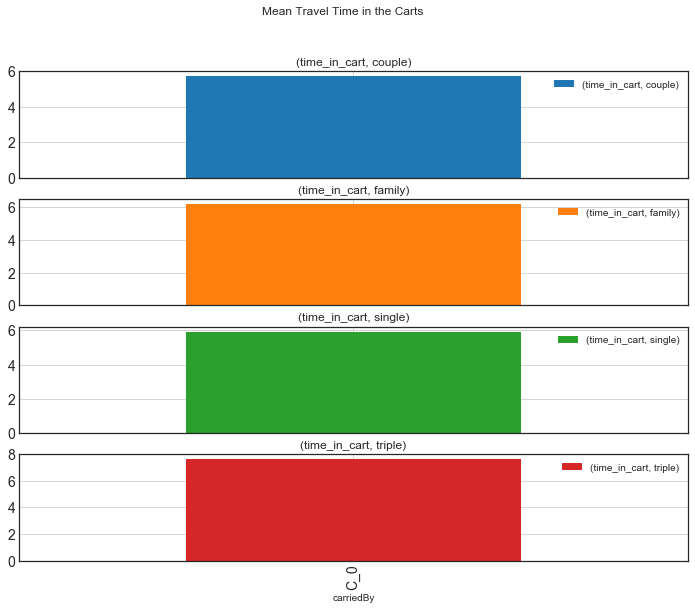

In [201]:
timeincarts.unstack(level=1).plot(kind='bar', stacked ='True', subplots='True', figsize=(12, 9), grid='True', title= 'Mean Travel Time in the Carts', fontsize=14)
 

https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas
df.loc[df['column_name'] == some_value]

df.loc[df['column_name'] == some_value]
To select rows whose column value is in an iterable, some_values, use isin:

df.loc[df['column_name'].isin(some_values)]
Combine multiple conditions with &:

df.loc[(df['column_name'] == some_value) & df['other_column'].isin(some_values)]
To select rows whose column value does not equal some_value, use !=:

df.loc[df['column_name'] != some_value]
isin returns a boolean Series, so to select rows whose value is not in some_values, negate the boolean Series using ~:

df.loc[~df['column_name'].isin(some_values)]

In [202]:
import json
 

def digit(row):
    return json.loads(row['stop_states'])  
 
                  

In [203]:
df['stop_states'] = df.apply(digit, axis=1)

In [204]:
# expand df.tags into its own dataframe
pass_vec_history = df['stop_states'].apply(pd.Series)

# rename each variable is tags
pass_vec_history = pass_vec_history.rename(columns = lambda x : 'pass_hist_S' + str(x))
# pass_vec_history.drop(pass_vec_history.columns[len(pass_vec_history.columns)-1], axis=1, inplace=True)

In [205]:
 pass_vec_history.head()

,pass_hist_S0,pass_hist_S1,pass_hist_S2,pass_hist_S3,pass_hist_S4,pass_hist_S5,pass_hist_S6,pass_hist_S7
0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0
3,0,2,0,1,0,0,0,0
4,0,0,0,1,1,0,1,0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff87e2271d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7ff87d4b64a8>], dtype=object)

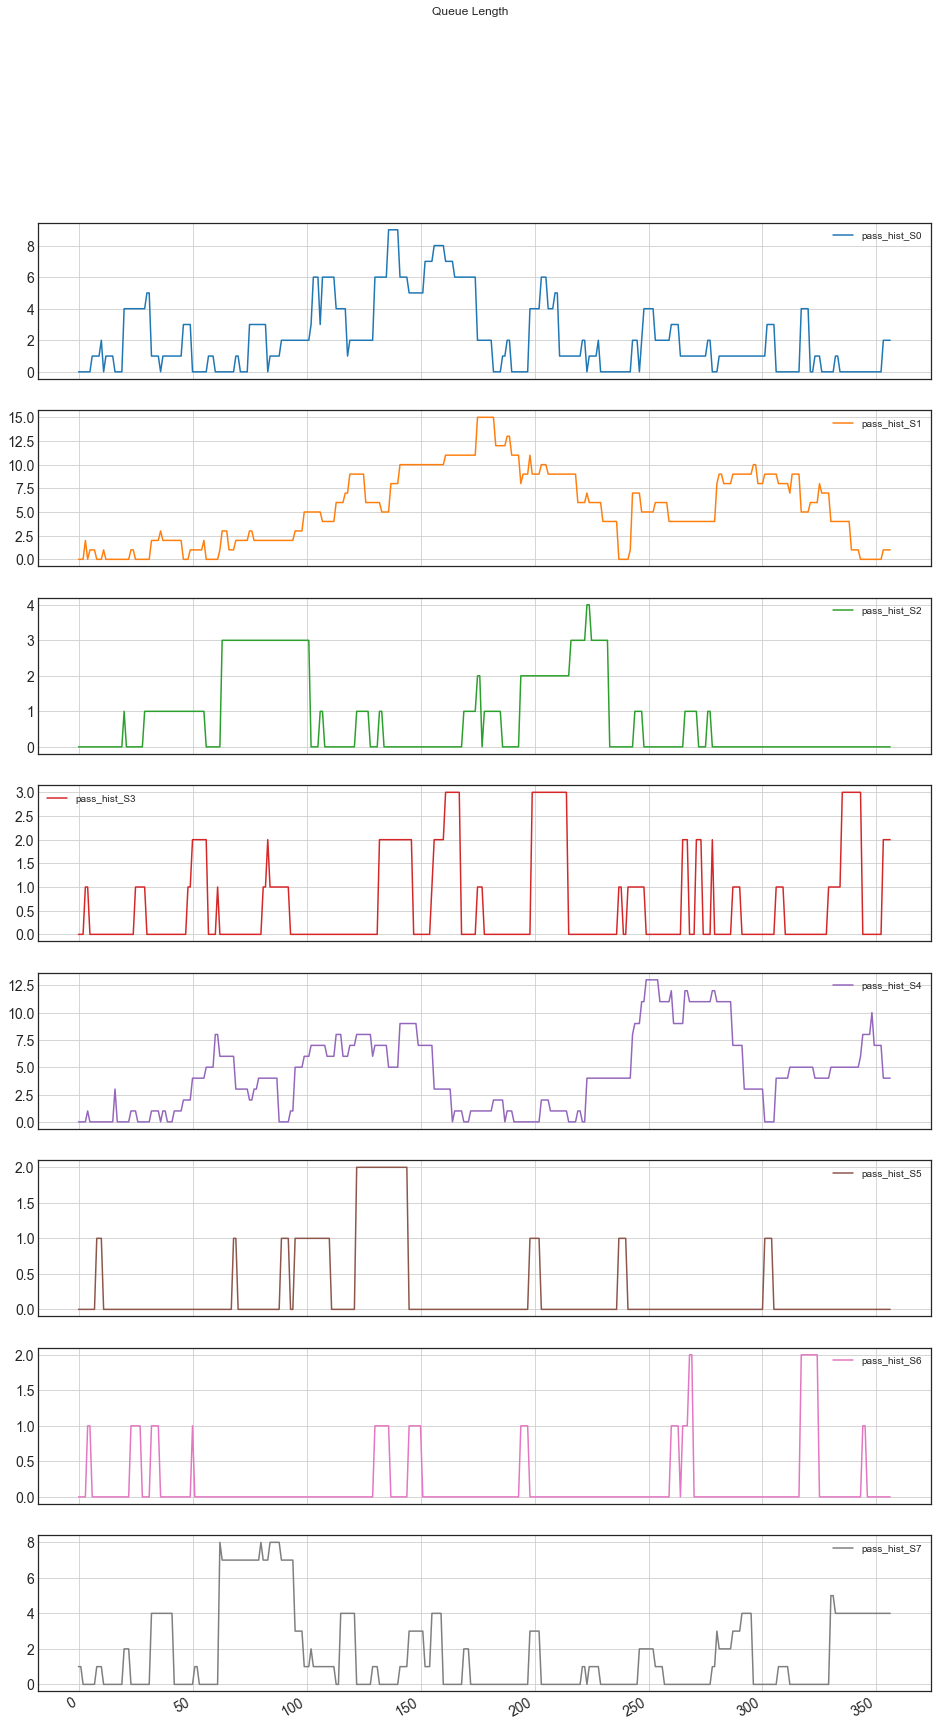

In [206]:
pass_vec_history.plot(kind='line', stacked ='True', subplots='True', figsize=(16, 30), grid='True', title= 'Queue Length', fontsize=14)

In [207]:
df.head()


,Unnamed: 0,passID,passengerType,daytime,arrival_time,fromStop,toStop,getIn_time,getOffTime,waitingDuration,carriedBy,stop_states,time_in_cart
0,0,1,single,07:07:11,234,S_2,---> S_5,251.0,431.0,3.28,C_0,"[0, 0, 0, 0, 0, ...",3.000000
1,1,0,single,07:10:08,225,S_3,---> S_7,312.0,608.0,6.38,C_0,"[0, 0, 0, 0, 0, ...",4.933333
2,2,2,single,07:12:28,424,S_7,---> S_0,611.0,748.0,5.40,C_0,"[0, 0, 0, 0, 0, ...",2.283333
3,3,3,single,07:21:07,757,S_0,---> S_6,811.0,1267.0,8.50,C_0,"[0, 2, 0, 1, 0, ...",7.600000
4,4,5,single,07:30:23,1166,S_1,---> S_3,1657.0,1823.0,10.95,C_0,"[0, 0, 0, 1, 1, ...",2.766667


In [208]:
sars =pd.read_csv('sars_history_constrained_cart_epoch_0.csv', sep='\t')

In [209]:
cart_occupancy  = sars.groupby('cartID').occupancy
cart_occupancy.describe()

,count,mean,std,min,25%,50%,75%,max
cartID,,,,,,,,
C_0,1272.0,2.583333,1.306995,0.0,2.0,3.0,4.0,4.0


(<matplotlib.axes._subplots.AxesSubplot at 0x7ff87d451898>, cartID
 C_0    356
 Name: carried, dtype: int64)

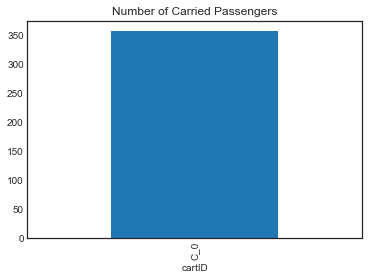

In [210]:
cart_carried = sars.groupby('cartID').carried.max()
cart_carried.plot(kind='bar', title = 'Number of Carried Passengers'), cart_carried

In [211]:
occupancy_table = pd.pivot_table(sars,index=["cartID","occupancy"])
occupancy_table

Unnamed: 0     carried  cart_position  delta_reward  reward  \
cartID occupancy                                                                
C_0    0          567.300000  153.890000       3.600000           0.0     0.0   
       1          581.459184  158.255102       3.561224           0.0     0.0   
       2          632.175824  172.285714       3.699634           0.0     0.0   
       3          623.929104  168.787313       3.701493           0.0     0.0   
       4          684.742529  185.595402       2.873563           0.0     0.0   

                      sim_time  time_since  
cartID occupancy                            
C_0    0          22596.540000         0.0  
       1          23117.244898         0.0  
       2          25085.073260         0.0  
       3          24826.373134         0.0  
       4          27194.151724         0.0

In [212]:
occupancy_series = sars.pivot_table(index = [ 'sim_time'], values = ['cartID', 'occupancy'])



In [213]:

occupancy_series.index.names, occupancy_series.columns


(FrozenList(['sim_time']), Index(['occupancy'], dtype='object'))

In [214]:
occupancy_series2 = sars.groupby(['cartID'])['occupancy', 'sim_time']
occupancy_series2 = list(occupancy_series2)

In [215]:
 len(occupancy_series2)

1

In [216]:
# occupancy_series2[0][1], len(occupancy_series2[1])

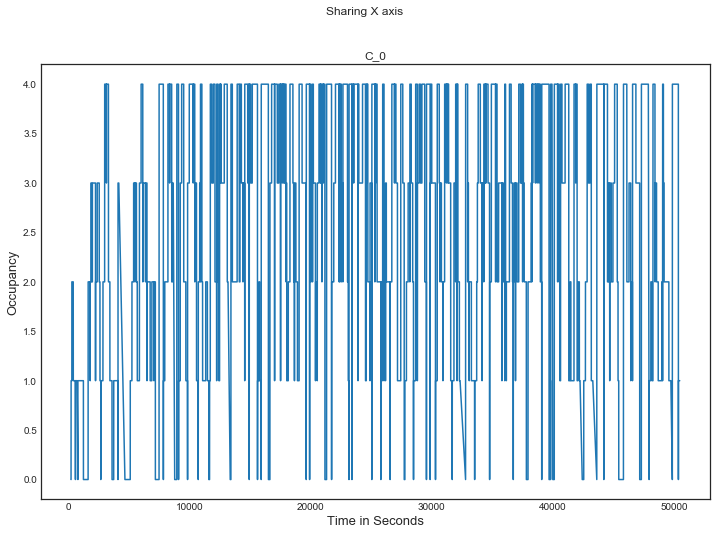

In [217]:
f, axarr = plt.subplots(len(occupancy_series2), sharex=False, figsize=[12, 8])
f.suptitle('Sharing X axis')
 
if len(occupancy_series2)>1:
    for i in range(len(occupancy_series2)):
        data = occupancy_series2[i][1]
        data_x = data.sim_time
        data_y = data.occupancy

        axarr[i].plot(data_x, data_y)
        axarr[i].set_title( occupancy_series2[i][0])
        axarr[i].xaxis.label.set_size(13)
        axarr[i].yaxis.label.set_size(13)

    axarr[i].set(xlabel='Time in Seconds')    

    for ax in axarr.flat:
        ax.set(ylabel='Occupancy')
else:
        data = occupancy_series2[0][1]
        data_x = data.sim_time
        data_y = data.occupancy

        axarr.plot(data_x, data_y)
        axarr.set_title( occupancy_series2[0][0])
        axarr.xaxis.label.set_size(13)
        axarr.yaxis.label.set_size(13)
        axarr.set(xlabel='Time in Seconds')  
        axarr.set(ylabel='Occupancy')

In [218]:
series, average_occupancies = time_average.time_average(sars, 'occupancy')
average_occupancies #['C_0']

{'C_0': 2.0564853556485354}

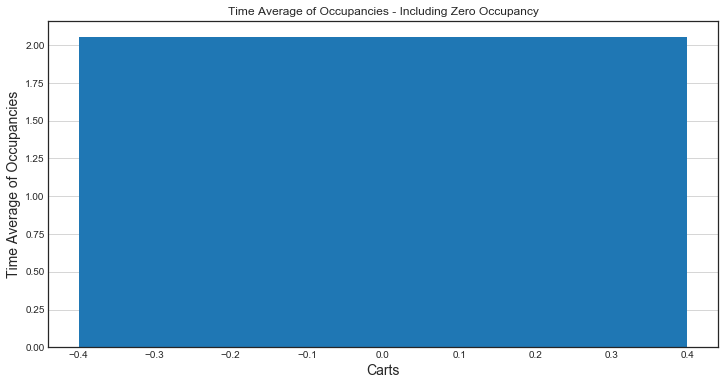

In [219]:
fig, ax = plt.subplots(figsize=(12,6))

ax.set_title('Time Average of Occupancies - Including Zero Occupancy')
ax.yaxis.grid() 
ax.set_xlabel('Carts', fontsize = 14)
ax.set_ylabel('Time Average of Occupancies', fontsize = 14)
 

i = 0

for key, value in average_occupancies.items():
    ax.bar(i, average_occupancies[key])
    i +=1

 

In [220]:
not_zero = [occ for occ in series['C_0']['occupancy'] if occ>0]
not_zero_avg = sum(not_zero) / len(not_zero)
not_zero_avg

2.6226415094339623

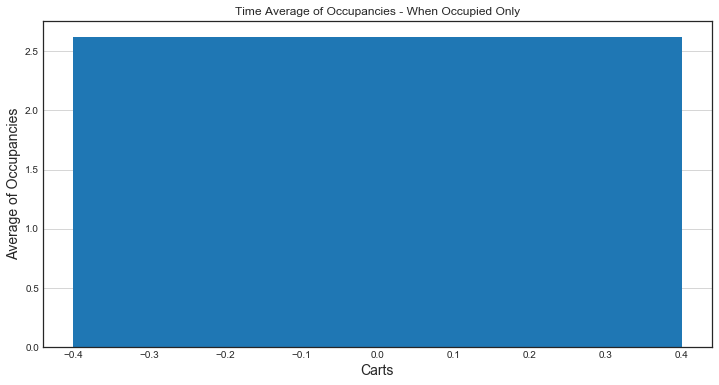

In [221]:
fig, ax = plt.subplots(figsize=(12,6))

ax.set_title('Time Average of Occupancies - When Occupied Only')
ax.yaxis.grid() 
ax.set_xlabel('Carts', fontsize = 14)
ax.set_ylabel('Average of Occupancies', fontsize = 14)
 

i = 0

for key, value in series.items():
    not_zero = [occ for occ in series[key]['occupancy'] if occ>0]
    not_zero_avg = sum(not_zero) / len(not_zero)
    
    ax.bar(i, not_zero_avg)
    i +=1
